<a href="https://colab.research.google.com/github/Annguyn/plant-detective/blob/main/guava.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip '/content/drive/MyDrive/Colab Notebooks/dataset_guav.zip' -d '/content/drive/MyDrive/Colab Notebooks/'

Archive:  /content/drive/MyDrive/Colab Notebooks/dataset_guav.zip
  inflating: /content/drive/MyDrive/Colab Notebooks/Guava+dataset/dot/20241111152531(1).jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Guava+dataset/dot/20241111151953.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Guava+dataset/dot/20241111153027(1).jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Guava+dataset/dot/20241111152725.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Guava+dataset/dot/20241111152521.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Guava+dataset/dot/20241111152531.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Guava+dataset/dot/20241111153027.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Guava+dataset/dot/20241111152953.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Guava+dataset/dot/20241111152007(1).jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Guava+dataset/dot/20241111152945.jpg  
  inflating: /c

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE_X = 224
IMAGE_SIZE_Y = 224
NUM_CLASSES = 3
CHANNELS=3
EPOCHS=50

In [ ]:
train_dir = "/content/drive/MyDrive/Colab Notebooks/Guava+dataset/train"
valid_dir = "/content/drive/MyDrive/Colab Notebooks/Guava+dataset/val"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Guava+dataset/test"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE_X, IMAGE_SIZE_Y),
    batch_size=16,
    class_mode='categorical'
)

Found 134 images belonging to 3 classes.


In [ ]:
import tensorflow as tf

IMG_SIZE = (IMAGE_SIZE_X, IMAGE_SIZE_Y)
BATCH_SIZE = 16

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = test_dir,
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE
).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

valid_datasets = tf.keras.preprocessing.image_dataset_from_directory(
    directory = valid_dir,
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE
)

class_names = valid_datasets.class_names
valid_data = valid_datasets.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


Found 34 files belonging to 3 classes.
Found 36 files belonging to 3 classes.


In [ ]:
print(class_names)

['dot', 'healthy', 'rust']


In [ ]:
import numpy as np

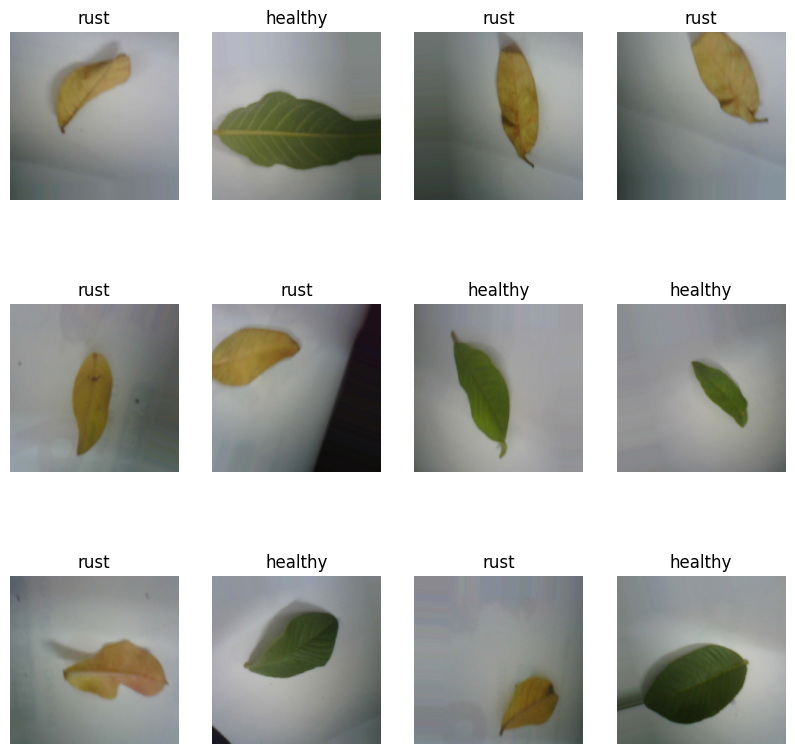

In [ ]:
plt.figure(figsize=(10, 10))

image_batch, label_batch = next(train_data)

for i in range(min(12, len(image_batch))):
    plt.subplot(3, 4, i + 1)
    plt.imshow(image_batch[i].astype("uint32"))
    plt.title(class_names[np.argmax(label_batch[i])])
    plt.axis("off")

NameError: name 'data_augmentation' is not defined

<Figure size 1200x500 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def count_images_per_class(directory):
    class_counts = {}
    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            class_counts[class_name] = len(os.listdir(class_dir))
    return class_counts


import os
train_counts = count_images_per_class(train_dir)
valid_counts = count_images_per_class(valid_dir)
test_counts = count_images_per_class(test_dir)

print("Training Set:")
for class_name, count in train_counts.items():
    print(f"  {class_name}: {count} images")

print("\nValidation Set:")
for class_name, count in valid_counts.items():
    print(f"  {class_name}: {count} images")

print("\nTest Set:")
for class_name, count in test_counts.items():
    print(f"  {class_name}: {count} images")

Training Set:
  dot: 40 images
  healthy: 42 images
  rust: 52 images

Validation Set:
  dot: 6 images
  healthy: 16 images
  rust: 14 images

Test Set:
  dot: 5 images
  healthy: 16 images
  rust: 13 images


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE_X, IMAGE_SIZE_Y, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 4,213,926 (16.07 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
import os

for class_name in class_names:
  class_dir = os.path.join(train_dir, class_name) #
  num_images = len(os.listdir(class_dir))
  print(f"Class: {class_name}, Number of images: {num_images}")

Class: dot, Number of images: 40
Class: healthy, Number of images: 42
Class: rust, Number of images: 52


In [ ]:
checkpoint_path = "CheckPoint/cp.ckpt.weights.h5"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    save_best_only=True
)

In [ ]:
history = model.fit(
    train_data,
    epochs=100,
    validation_data=test_data,
    callbacks=[
        checkpoint_callback,
    ]
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.3013 - loss: 1.2567 - val_accuracy: 0.6471 - val_loss: 0.9479
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 161ms/step - accuracy: 0.4244 - loss: 1.1231 - val_accuracy: 0.7941 - val_loss: 0.8445
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - accuracy: 0.5198 - loss: 1.0186 - val_accuracy: 0.7941 - val_loss: 0.7683
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - accuracy: 0.5377 - loss: 0.9345 - val_accuracy: 0.8529 - val_loss: 0.7136
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - accuracy: 0.6386 - loss: 0.8542 - val_accuracy: 0.8529 - val_loss: 0.6704
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 183ms/step - accuracy: 0.6533 - loss: 0.8490 - val_accuracy: 0.8824 - val_loss: 0.6380
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - accuracy: 0.6473 - loss: 0.8089 - val_accuracy: 0.8824 - val_loss: 0.5907
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 220ms/step - accuracy: 0.6578 - loss: 0.8166 - val_accuracy: 0.9118 - val_loss: 

In [ ]:
# scores = model.evaluate(test_ds)

In [ ]:
# scores

In [ ]:
history

In [ ]:
history.params

{'verbose': 'auto', 'epochs': 100, 'steps': 9}

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
type(history.history['loss'])

list

In [ ]:
len(history.history['loss'])

100

In [ ]:
history.history['loss'][:5]

[1.2844836711883545,
 1.0833832025527954,
 0.9983962178230286,
 0.9225605130195618,
 0.8741042017936707]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

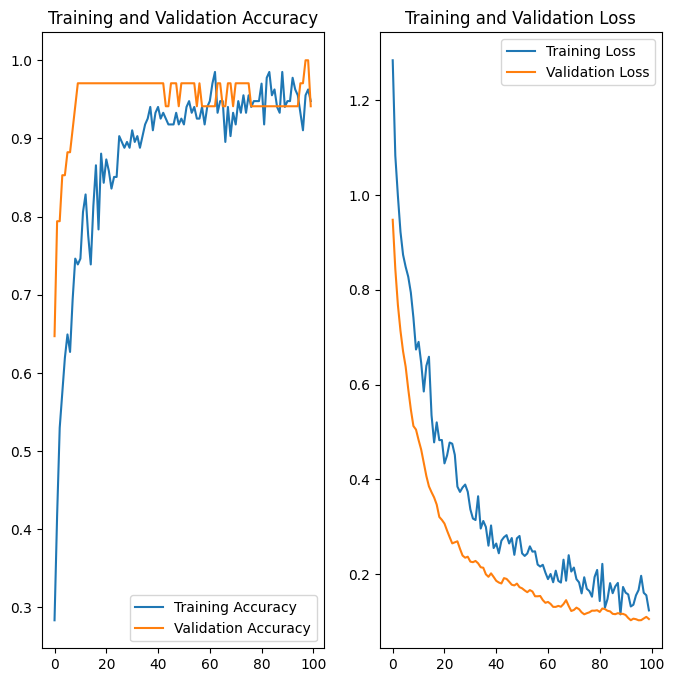

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


import tensorflow as tf

img = tf.keras.preprocessing.image.load_img(fn, target_size=(224, 224))
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = data_augmentation(x)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
classes


NameError: name 'fn' is not defined

In [ ]:
model.save('guava_model.keras')

In [ ]:
test_dir = "/content/drive/MyDrive/Colab Notebooks/Guava+dataset/test"
class_names = ['dot', 'healthy',  'rust']

for class_name in class_names:
    class_dir = os.path.join(test_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)

        img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)

        prediction = model.predict(img_array)
        predicted_class = class_names[np.argmax(prediction[0])]

        print(f"Image: {image_name}")
        print(f"Actual Class: {class_name}")
        print(f"Predicted Class: {predicted_class}")
        print("-" * 30)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Image: 20241111151532.jpg
Actual Class: dot
Predicted Class: rust
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Image: 20241111151612.jpg
Actual Class: dot
Predicted Class: dot
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Image: 20241111151758.jpg
Actual Class: dot
Predicted Class: dot
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Image: 20241111152043.jpg
Actual Class: dot
Predicted Class: dot
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Image: 20241111152531(1).jpg
Actual Class: dot
Predicted Class: healthy
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Image: 20241111163323.jpg
Actual Class: healthy
Predicted Class: healthy
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Image: 20241111163332.jpg
Actual Class: healthy
Predicted Class: healthy
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [ ]:
from google.colab import files
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


class_names = ['dot', 'healthy', 'rust']
uploaded = files.upload()

for fn in uploaded.keys():
    path = '/content/' + fn
    img = tf.keras.utils.load_img(path, target_size=(224, 224))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction[0])]
    confidence = round(100 * (np.max(prediction[0])), 2)

    print(f"Image: {fn}")
    print(f"Predicted class: {predicted_class}")
    print(f"Confidence: {confidence}%")

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}, Confidence: {confidence}%")
    plt.axis("off")
    plt.show()

KeyboardInterrupt: 

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
from tensorflow.keras.preprocessing import image

model = tf.keras.models.load_model('/content/guava_model.keras')

test_dir = "/content/drive/MyDrive/Colab Notebooks/test_data"
class_names = ['dot', 'healthy', 'rust']

correct_predictions = 0
total_predictions = 0

results = []

for class_name in class_names:
    class_dir = os.path.join(test_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)

        img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)

        prediction = model.predict(img_array)
        confidence = np.max(prediction[0])
        predicted_class = class_names[np.argmax(prediction[0])]

        total_predictions += 1
        if predicted_class == class_name:
            correct_predictions += 1

        results.append({
            "Image Name": image_name,
            "Predicted Class": predicted_class,
            "Actual Class": class_name,
            "Confidence": confidence
        })

accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0

results_df = pd.DataFrame(results)
print(results_df)

results_df.to_csv('/content/prediction_results.csv', index=False)

print(f"Test Accuracy: {accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━

In [ ]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
from tensorflow.keras.preprocessing import image

model = tf.keras.models.load_model('/content/guava_model.keras')

test_dir = "/content/drive/MyDrive/Colab Notebooks/guava-image"
class_names = ['dot', 'healthy', 'rust']

correct_predictions = 0
total_predictions = 0

results = []

for class_name in class_names:
    class_dir = os.path.join(test_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)

        img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)

        prediction = model.predict(img_array)
        confidence = np.max(prediction[0])
        predicted_class = class_names[np.argmax(prediction[0])]

        total_predictions += 1
        if predicted_class == class_name:
            correct_predictions += 1

        results.append({
            "Image Name": image_name,
            "Predicted Class": predicted_class,
            "Actual Class": class_name,
            "Confidence": confidence
        })

accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
results_df = pd.DataFrame(results)
print(results_df)

results_df.to_csv('/content/predict_result_2.csv', index=False)

print(f"Test Accuracy: {accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━

           Image Name Predicted Class Actual Class  Confidence
0  20241201090903.jpg             dot          dot    0.923433
1  20241201090842.jpg             dot          dot    0.806747
2  20241201090848.jpg             dot          dot    0.734289
3  20241201090757.jpg             dot          dot    0.499593
4  20241201090104.jpg             dot          dot    0.903441


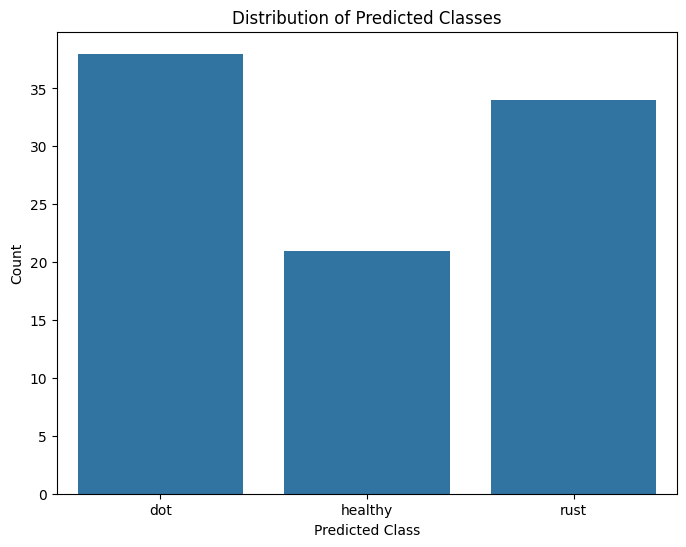

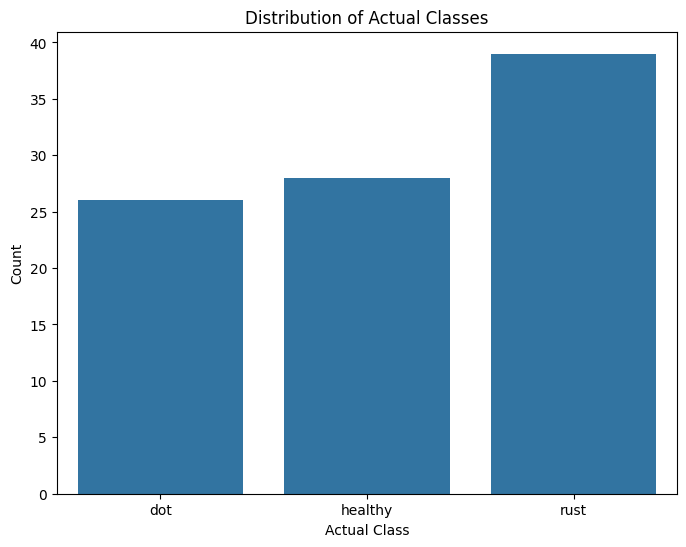

<ipython-input-7-2f913d159970>:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_by_class = df.groupby('Actual Class').apply(lambda x: (x['Predicted Class'] == x['Actual Class']).sum() / len(x))



Accuracy by Class:
Actual Class
dot        0.923077
healthy    0.678571
rust       0.871795
dtype: float64


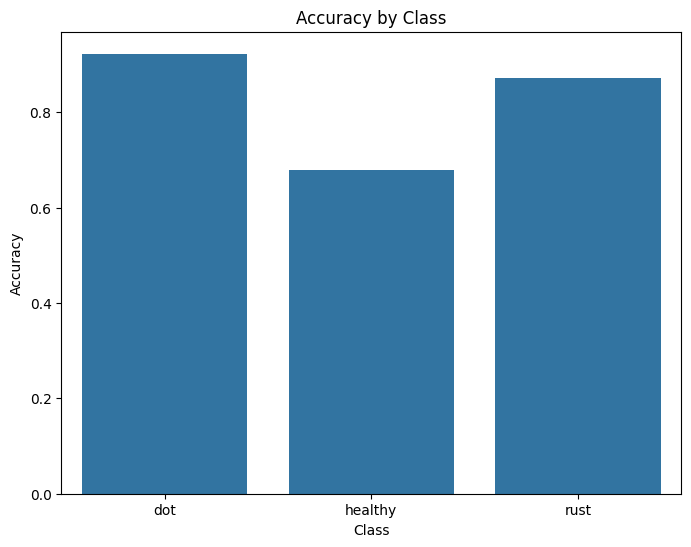

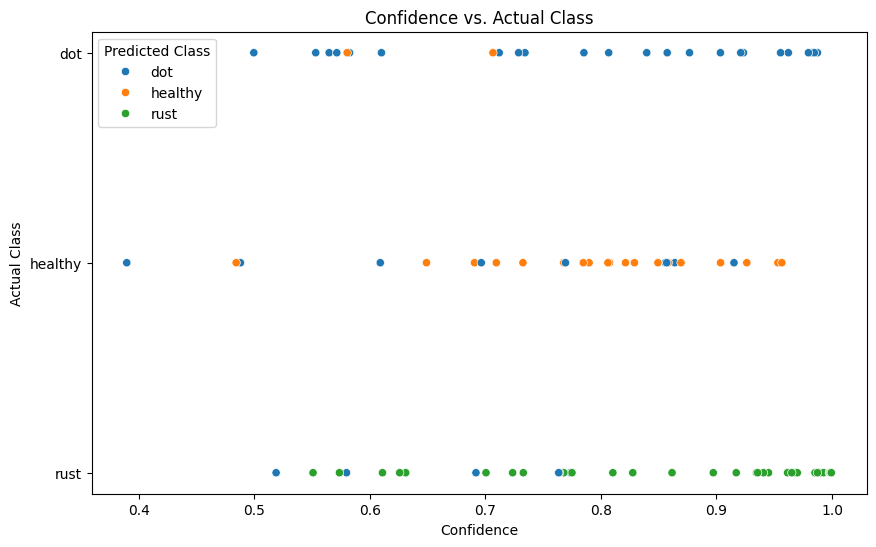

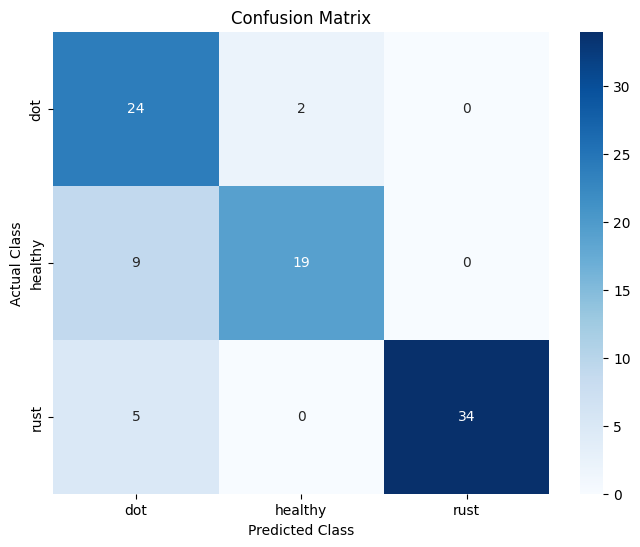

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/prediction_results.csv')

print(df.head())

plt.figure(figsize=(8, 6))
sns.countplot(x='Predicted Class', data=df)
plt.title('Distribution of Predicted Classes')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Actual Class', data=df)
plt.title('Distribution of Actual Classes')
plt.xlabel('Actual Class')
plt.ylabel('Count')
plt.show()


accuracy_by_class = df.groupby('Actual Class').apply(lambda x: (x['Predicted Class'] == x['Actual Class']).sum() / len(x))
print("\nAccuracy by Class:")
print(accuracy_by_class)

plt.figure(figsize=(8, 6))
sns.barplot(x=accuracy_by_class.index, y=accuracy_by_class.values)
plt.title('Accuracy by Class')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Confidence', y='Actual Class', data=df, hue='Predicted Class')
plt.title('Confidence vs. Actual Class')
plt.xlabel('Confidence')
plt.ylabel('Actual Class')
plt.show()

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(df['Actual Class'], df['Predicted Class'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
from openpyxl import Workbook
from openpyxl.drawing.image import Image as OpenpyxlImage
from openpyxl.utils import get_column_letter

model = tf.keras.models.load_model('/content/guava_model.keras')

test_dir = "/content/drive/MyDrive/Colab Notebooks/test_data"
class_names = ['dot', 'healthy', 'rust']

correct_predictions = 0
total_predictions = 0

results = []

for class_name in class_names:
    class_dir = os.path.join(test_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)

        img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)

        prediction = model.predict(img_array)
        confidence = np.max(prediction[0])
        predicted_class = class_names[np.argmax(prediction[0])]

        total_predictions += 1
        if predicted_class == class_name:
            correct_predictions += 1

        results.append({
            "Image Name": image_name,
            "Predicted Class": predicted_class,
            "Actual Class": class_name,
            "Confidence": confidence,
            "Image Path": image_path
        })

accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0

results_df = pd.DataFrame(results)

output_file = "/content/prediction_results_with_images.xlsx"
wb = Workbook()
ws = wb.active
ws.title = "Results"

headers = ["Image Name", "Predicted Class", "Actual Class", "Confidence", "Image"]
ws.append(headers)

for idx, row in results_df.iterrows():
    ws.append([row["Image Name"], row["Predicted Class"], row["Actual Class"], row["Confidence"]])
    img = OpenpyxlImage(row["Image Path"])
    img.height = 80
    img.width = 80
    image_cell = f"E{idx + 2}"
    ws.add_image(img, image_cell)

for col_idx, column_cells in enumerate(ws.columns, start=1):
    max_length = max((len(str(cell.value)) for cell in column_cells if cell.value), default=0)
    ws.column_dimensions[get_column_letter(col_idx)].width = max_length + 2

wb.save(output_file)

print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Results with images saved to {output_file}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━